In [1]:
using PyPlot

INFO: Loading help data...


In [2]:
#Temperatura y beta
kB=1
β(T)=1/(kB*T);

In [3]:
#Creamos el tipo configuracion
type Config
    N::Int
    M::Int
    conf::Array{Float64,2}
end

In [4]:
#Creamos un constructor de ese tipo 
function config(a,b)
    Config(a,b,2*(int(rand(a,b)))-1)
end

config (generic function with 1 method)

In [5]:
#Calculo de Energias
   
function energia_total(σ::Config)
    L1, L2 = σ.N, σ.M
    E = 0.0
    for i in 1:L1
        for j in 1:L2
            E += -σ.conf[i,j]*(σ.conf[mod1(i-1,L1),j]+σ.conf[mod1(i+1,L1),j]+
            σ.conf[i,mod1(j-1,L2)]+σ.conf[i,mod1(j+1,L2)])
        end
    end
    E/2
end

energia_total (generic function with 1 method)

In [6]:
function magnet(σ::Config)#?
    sum=0
    for i in 1:σ.N
        for j in 1:σ.M
            sum+=σ.conf[i,j]
        end
    end
    sum
end

magnet (generic function with 1 method)

In [7]:
function esplano(histo::Array) # 100 -> max, 0 -> min, el arreglo que se le dá debe ser un histograma
    prom = mean(histo)
    desviacion = 0
    for i in histo
        desviacion += abs(prom - i)
    end
    return (1 - desviacion/(length(histo)*sum(histo)))*100 # desviación total porcentual
end

esplano (generic function with 1 method)

In [8]:
function flip_one(A::Array{Float64,2},i::Int64,j::Int64)
    A[i,j]*=-1
    A
end

flip_one (generic function with 1 method)

In [9]:
function energia_ij(configuracion::Array{Float64,2},n::Int64,m::Int64,i::Int64,j::Int64)
    -configuracion[i,j]*(configuracion[mod1(i-1,n),j]+configuracion[mod1(i+1,n),j]+
        configuracion[i,mod1(j-1,m)]+configuracion[i,mod1(j+1,m)])/2
end

energia_ij (generic function with 1 method)

In [10]:
function esplano(histo::Array) # 100 -> max, 0 -> min, el arreglo que se le dá debe ser un histograma
    prom = mean(histo)
    desviacion = 0
    for i in histo
        desviacion += abs(prom - i)
    end
    return (1 - desviacion/(length(histo)*sum(histo))) # desviación total
end

esplano (generic function with 1 method)

In [11]:
int(25/2)

13

In [12]:
function wanglandau(N,M)
    σ=config(N,M)
    Emin, Emax = -2*N*M, 2*N*M
    Energias = [Emin:Emax]   #Vector de energías
    H = zeros(length(Energias)) #Histograma
    S = zeros(length(Energias)) #Vector de entropías
    E = energia_total(σ)
    H[E-Emin+1] += 1 #Aumentamos en 1 el histograma
    f = 1 #factor de modificación inicia
    while f >= 1e-6
        #LLenamos el histograma al principio
        for k in 1:(2*length(H))
            i,j = rand(1:N),rand(1:M)
            ΔE = -2*energia_ij(σ.conf,N,M,i,j)
            η = min(1, exp(S[E-Emin+1])-exp(S[E+ΔE-Emin+1]))
            if rand() < η
                E = E + ΔE
                σ.conf = flip_one(σ.conf,i,j)
            end
            H[E-Emin+1] += 1
            S[E-Emin+1] += f
            end
        #Ahora empezamos el algoritmo
        while esplano(H/sum(H)) <.90 #minimum(H[H.!=0])<0.8*mean(H[H.!=0])
            i,j = rand(1:N),rand(1:M)
            ΔE = -2*energia_ij(σ.conf,N,M,i,j)
            η = min(1, exp(S[E-Emin+1])-exp(S[E+ΔE-Emin+1]))
            if rand() < η
                E = E + ΔE
                σ.conf = flip_one(σ.conf,i,j)
            end
            H[E-Emin+1] += 1
            S[E-Emin+1] += f
        end
        H = zeros(length(Energias)) #Histograma
        f = f/2
    end
    S
end

wanglandau (generic function with 1 method)

In [13]:
#Función de particion
function Z(T, N, M)
    ZZ = big(0)
    Emin, Emax = -2*N*M, 2*N*M
    Energias = [Emin:Emax]
    SS = wanglandau(N,N)
    g(SS)=[exp(i) for i in SS] 
    for E in Energias
        ZZ += g(SS)[E-Emin+1]*exp(-β(T)*E)
    end
    ZZ
end

Z (generic function with 1 method)

In [14]:
#Entropia final
N=5
M=5

SS=wanglandau(N,N)
g(SS)=[exp(i) for i in SS] 
Emin, Emax = -2*N*M , 2*N*M;
Energias = [Emin:Emax] ;
SS

101-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

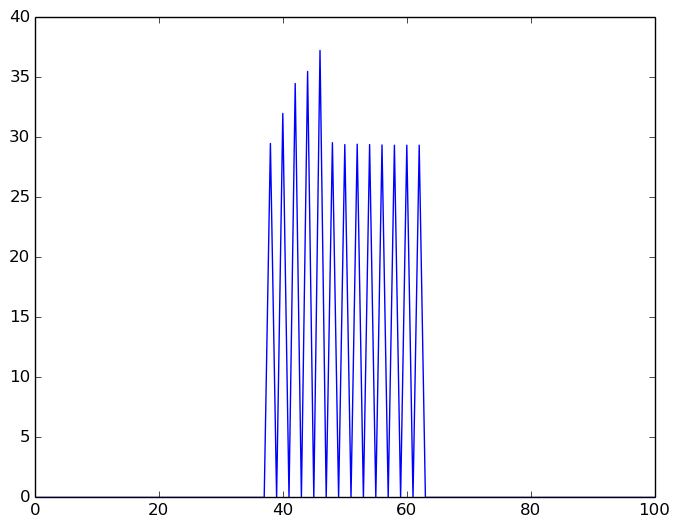

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff06f9c8990>

In [15]:
plot(SS)

elapsed time: 0.019047011 seconds (3658984 bytes allocated)


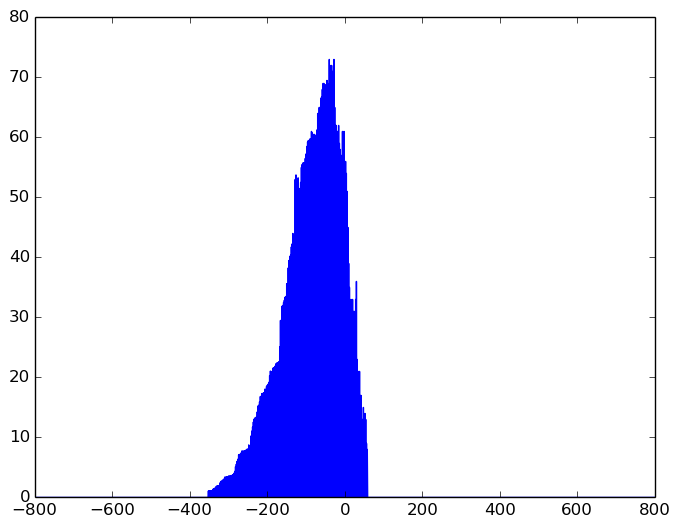

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff032cb3910>

In [16]:
N, M = 20, 20
@time wanglandau(N,M)
plot([-2*N*M:2*N*M], wanglandau(N,M))

In [17]:
N, M = 50, 50
Temperaturas = [0.1:1:20.1]
lenT = length(Temperaturas)
out = zeros(lenT)
for i in 1:lenT

    out[i] = Z(Temperaturas[i], N, M)
end

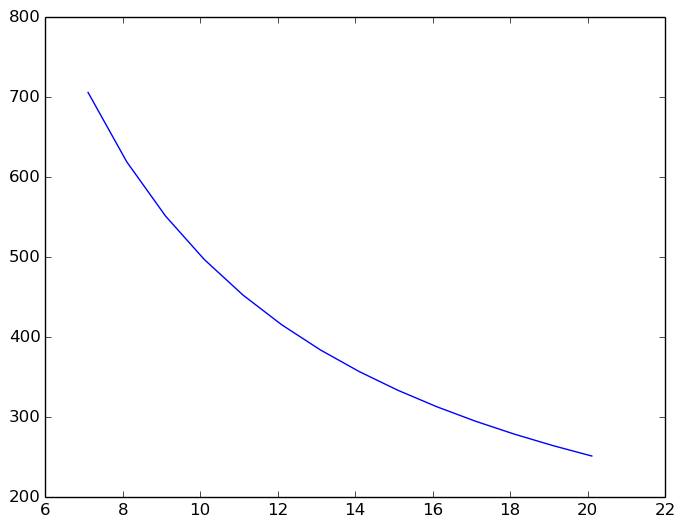

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff032bfed50>

In [18]:
plot(Temperaturas, log(out))

In [19]:
@time Z(2,100,100)

elapsed time: 20.998937843 seconds (12904151300 bytes allocated, 40.61% gc time)


inf with 256 bits of precision

In [20]:
function Ebarra(T,N,M)
    Eprom = big(0)
    Emin, Emax = -2*N*M, 2*N*M
    Energias = [Emin:Emax]
    for E in Energias
        Eprom += E*exp(-β(T)*E)
    end
    Eprom/Z(T,M,N)
end

Ebarra (generic function with 1 method)

In [21]:
N, M = 20, 20
Ts = [0.01:0.5:20.01]
out1 = zeros(length(Ts))
for T in 1:length(Ts)
    out1[T] = Ebarra(T,N,M)
end

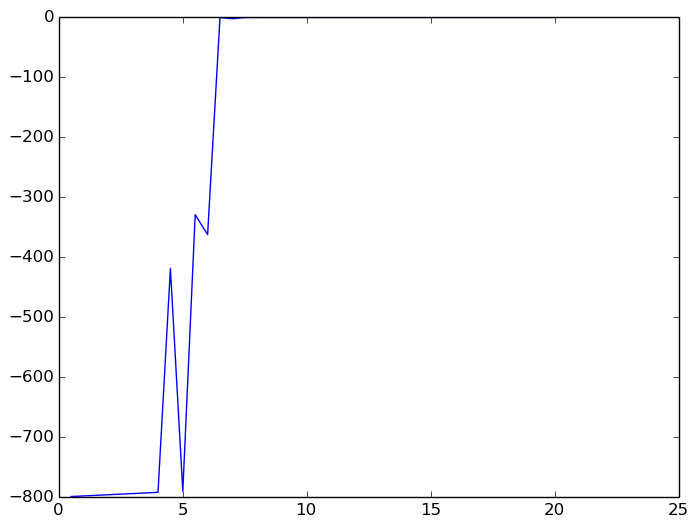

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff032b34710>

In [22]:
plot(Ts,out1)

In [23]:
Ebarra(20,30,30)^2

8.093681933413772745922697139018575296002888215334370382524350344622629734089303e-01 with 256 bits of precision

In [24]:
Z(20,30,30)

1.036628852219889175289062924498316190735915096992397245827894696487400745584836e+42 with 256 bits of precision

In [25]:
function Ebarra2(T,N,M)
    Eprom = big(0)
    Emin, Emax = -2*N*M, 2*N*M
    Energias = [Emin:Emax]
    for E in Energias
        Eprom += E^2*exp(-β(T)*E)
    end
    Eprom/Z(T,M,N)
end

Ebarra2 (generic function with 1 method)

In [26]:
Ebarra2(20,30,30)

2.998690253384135146992483543751713666644340772116050262889311661211366951971331e+06 with 256 bits of precision

In [27]:
N, M = 20, 20
Ts = [0.01:0.5:20.01]
out2 = zeros(length(Ts))
for T in 1:length(Ts)
    out2[T] = (β(T))^2(Ebarra2(T,N,M) - (Ebarra(T,N,M))^2)
end

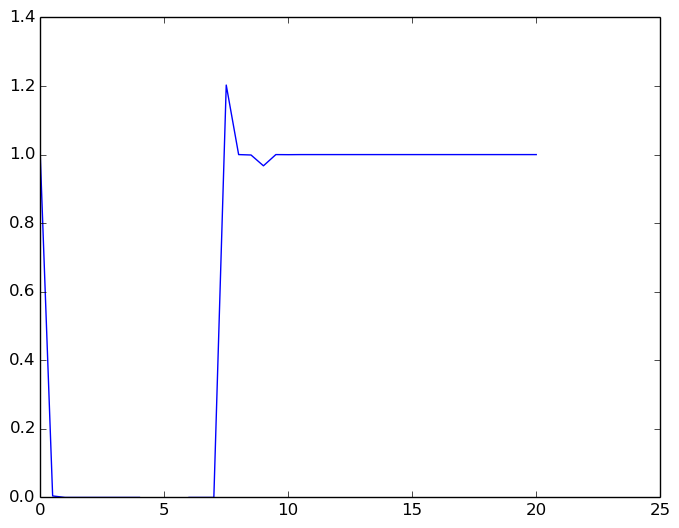

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff032a60710>

In [28]:
plot(Ts,out2)